In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="darkgrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [15]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [16]:
df.head()

,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,anvar,0.2,10.0,13.911389,39.113891,3.163908
1,grimax,0.2,10.0,11.313708,13.137085,0.078965
2,anvar,0.2,12.5,16.637033,33.096261,3.279166
3,grimax,0.2,12.5,12.727922,1.823376,0.081529
4,anvar,0.2,15.0,20.449060,36.327066,3.219255


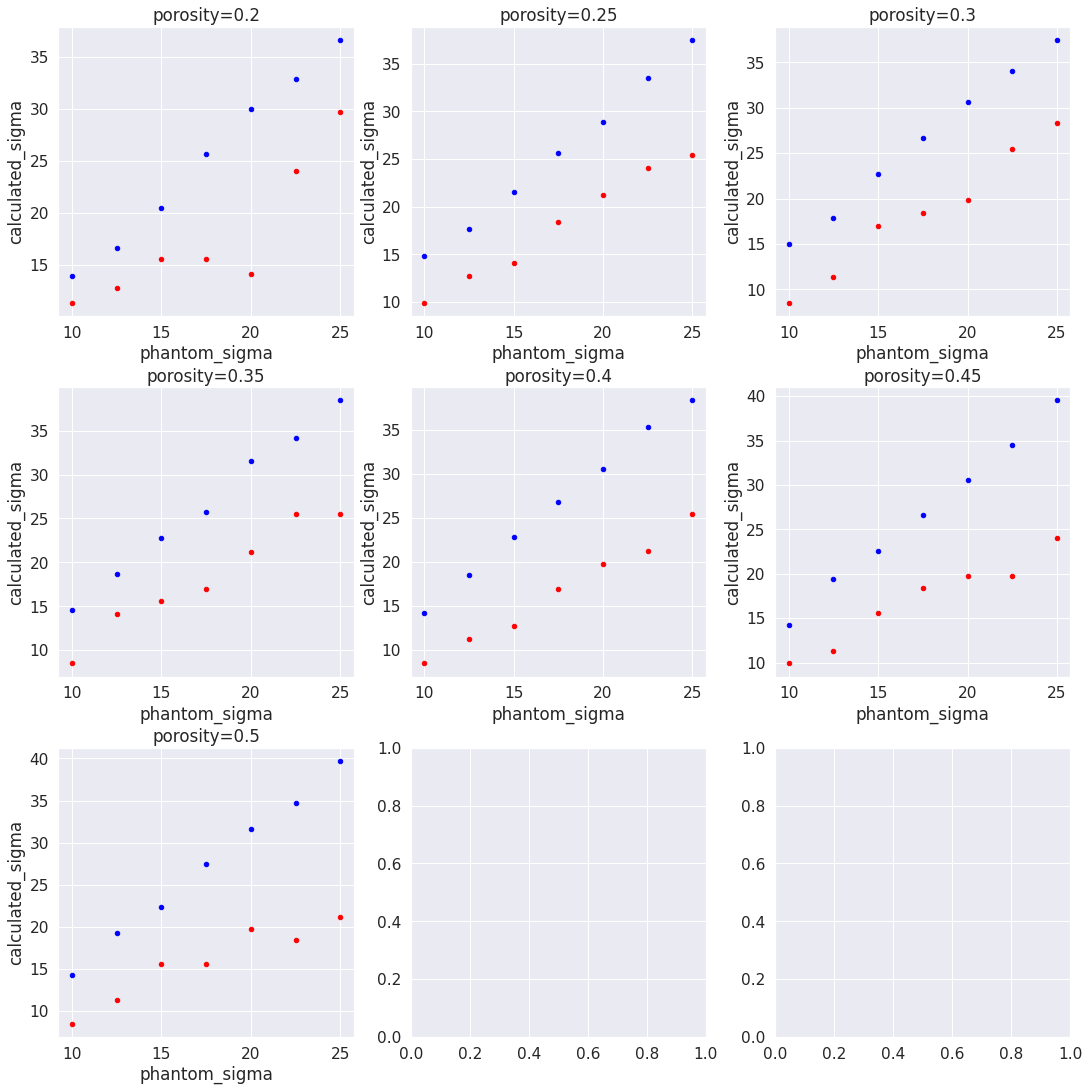

In [19]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           color=c)
        ax.set_title(f"porosity={p}")


In [20]:
porosities

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])